Input:  tensor([[ 1.0000,  8.0000, 12.0000, 18.0000, 21.0000,  0.1000,  1.0000,  3.0000,
          2.5000,  2.5000]])
Output:  tensor([[ 3.7169,  6.6155,  6.9995,  8.4534, 13.6075,  2.8886,  0.3740,  1.4439,
          0.3225,  0.6360]])
Tank levels  tensor([[ 1.9195,  4.2308,  4.2254,  4.5107,  4.5054,  5.5462,  5.5402,  5.7588,
          2.3780,  2.7518, -4.0291]], dtype=torch.float64)
Total cost:  tensor(59.8648)
Time taken:  0.3839871883392334 seconds


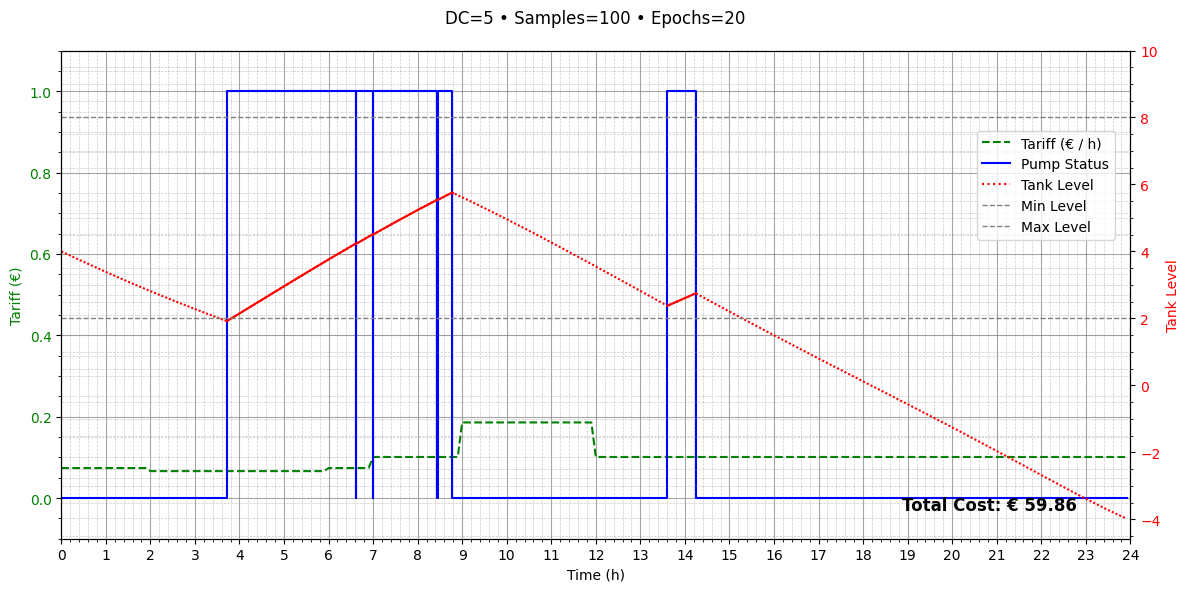

###########################################
Input:  tensor([[ 1.0000,  8.0000, 12.0000, 18.0000, 21.0000,  2.0000,  1.0000,  3.0000,
          2.5000,  2.5000]])
Output:  tensor([[ 3.9798,  7.7667,  8.1704,  9.6946, 15.5169,  2.8541,  0.3937,  0.3793,
          1.1499,  0.4641]])
Tank levels  tensor([[ 1.7884,  4.0650,  3.5412,  3.8231,  3.8171,  4.0826,  3.3482,  4.0659,
          0.6889,  0.9759, -4.5650]], dtype=torch.float64)
Total cost:  tensor(68.4117)
Time taken:  0.10700798034667969 seconds


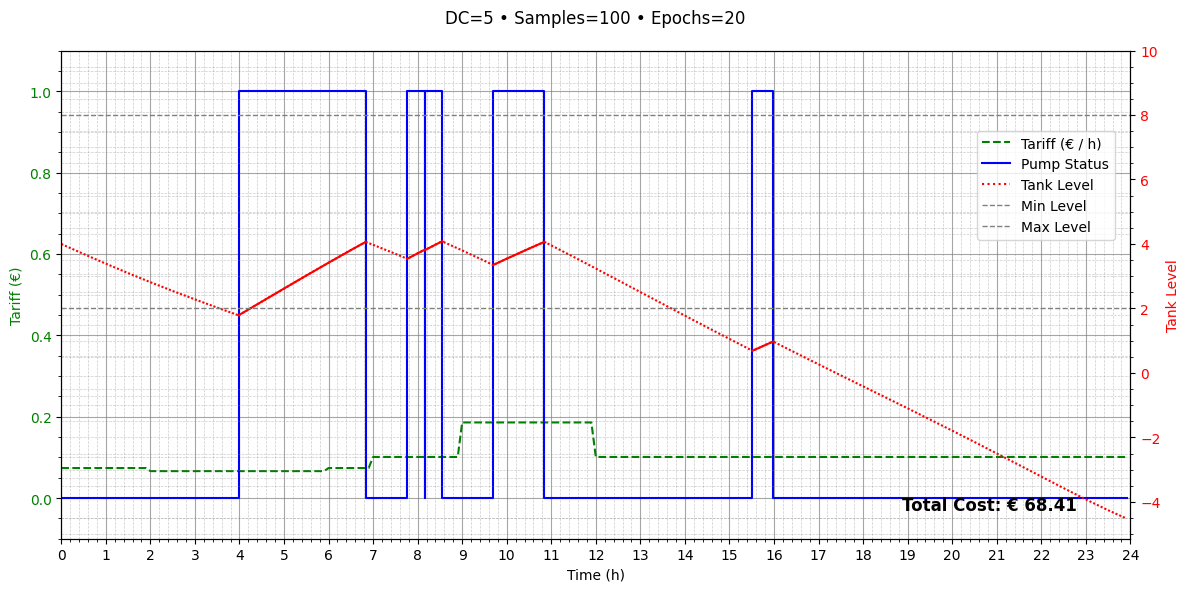

###########################################
Input:  tensor([[ 1.0000,  8.0000, 12.0000, 18.0000, 21.0000,  3.0000,  1.0000,  3.0000,
          2.5000,  2.5000]])
Output:  tensor([[ 5.0761,  8.3405,  8.8251, 12.0181, 15.3487,  2.7471,  0.4745,  0.3879,
          0.9594,  0.4164]])
Tank levels  tensor([[ 1.2464,  3.3779,  3.0700,  3.3977,  3.3914,  3.6275,  1.7099,  2.2727,
          0.5552,  0.8117, -4.8814]], dtype=torch.float64)
Total cost:  tensor(59.0604)
Time taken:  0.1486225128173828 seconds


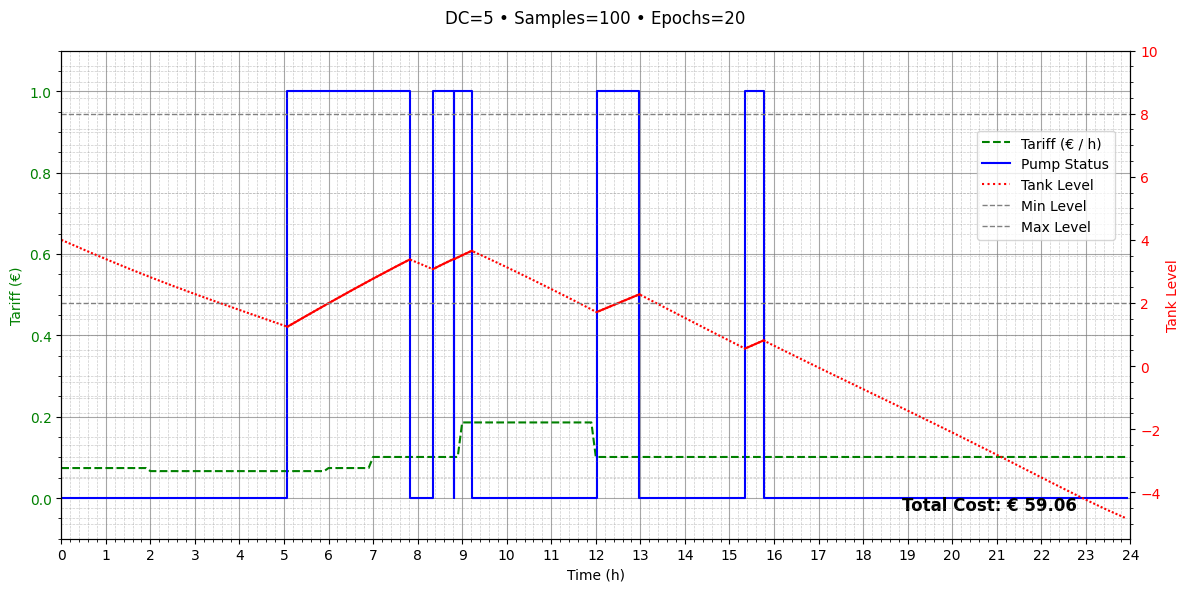

###########################################
Input:  tensor([[ 4.0000,  8.0000, 12.0000, 17.0000, 20.0000,  3.0000,  3.0000,  3.0000,
          2.5000,  2.5000]])
Output:  tensor([[ 8.5500, 10.0004, 10.7675, 13.9043, 14.6022,  1.4404,  0.7571,  0.6037,
          0.4624,  1.7596]])
Tank levels  tensor([[-0.6524,  0.3127,  0.3123,  0.7895,  0.7827,  1.1516, -0.6926, -0.4147,
         -0.5847,  0.5013, -4.7744]], dtype=torch.float64)
Total cost:  tensor(89.6482)
Time taken:  0.07567143440246582 seconds


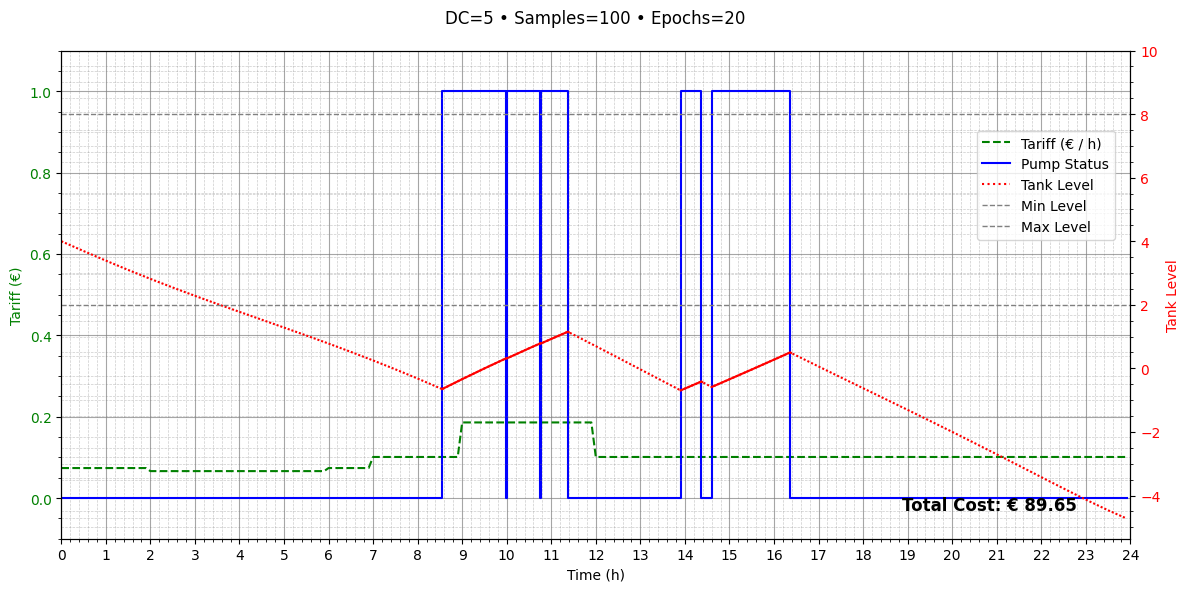

###########################################
Input:  tensor([[ 4.0000,  8.0000, 12.0000, 17.0000, 20.0000,  3.0000,  3.0000,  3.0000,
          2.5000,  2.5000]])
Output:  tensor([[ 8.5500, 10.0004, 10.7675, 13.9043, 14.6022,  1.4404,  0.7571,  0.6037,
          0.4624,  1.7596]])
Tank levels  tensor([[-0.6524,  0.3127,  0.3123,  0.7895,  0.7827,  1.1516, -0.6926, -0.4147,
         -0.5847,  0.5013, -4.7744]], dtype=torch.float64)
Total cost:  tensor(89.6482)
Time taken:  0.14766812324523926 seconds


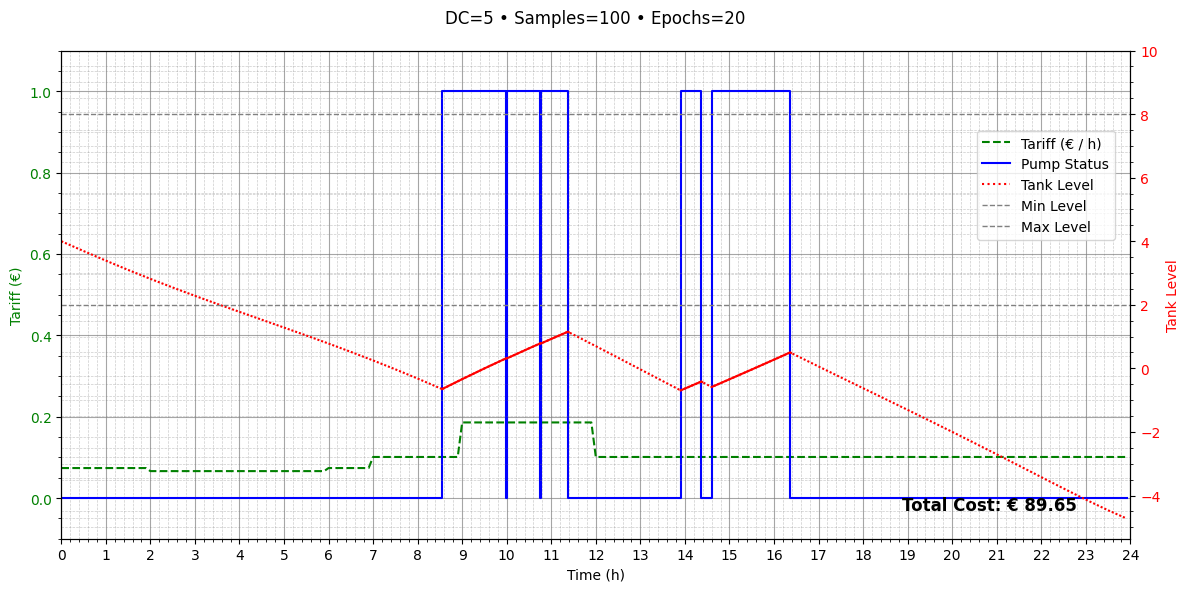

###########################################
Input:  tensor([[ 0.3000,  4.0000, 12.0000, 19.0000, 21.0000,  5.0000,  2.0000,  3.0000,
          2.0000,  1.0000]])
Output:  tensor([[ 3.2267,  9.8547, 16.8203, 17.3714, 19.0359,  1.2968,  0.4618,  0.5411,
          0.6482,  1.4494]])
Tank levels  tensor([[ 2.1671,  3.1816,  0.1982,  0.4944, -4.1589, -3.8060, -3.8128, -3.3883,
         -4.0818, -3.1536, -5.5906]], dtype=torch.float64)
Total cost:  tensor(55.3507)
Time taken:  0.10300230979919434 seconds


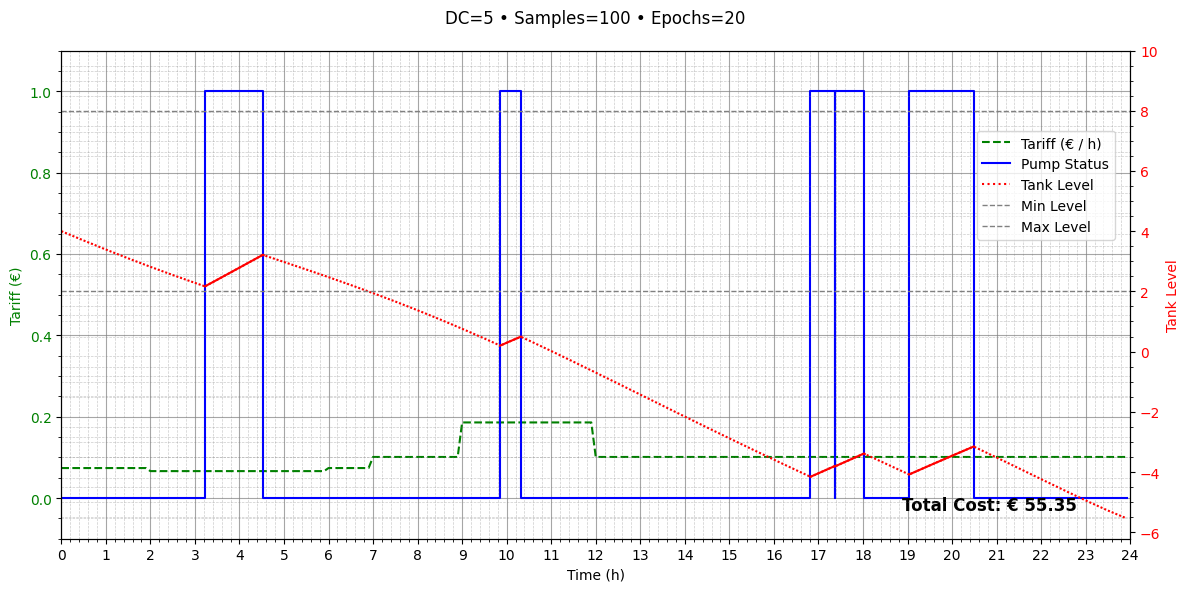

###########################################


In [18]:
import pickle
import numpy as np
import torch
import warnings
from functools import reduce
import matplotlib.pyplot as plt
import torch.nn as nn
import plot_nivel_tanque_new
from method import NNSolver
import os
import plot_nivel_tanque_new as plot_nivel_tanque_new
import utils
import time

torch.xpu.is_available()
warnings.filterwarnings("ignore")
data_path = os.path.join("datasets", "dc_wss", "dc_wss_dataset_dc5_ex100")

with open(data_path, "rb") as f:
    data = pickle.load(f)
#file_name = "model_2025-06-17_14-56-31_dc5_samples8_epochs50_softWeight100.pt"
file_name = "model_2025-06-17_06-17-12_dc5_samples100_epochs20_softWeight100.pt"
file_path = os.path.join("models", file_name)
samples = int(file_name.split("samples")[1].split("_")[0])
epochs = int(file_name.split("epochs")[1].split("_")[0])

# ############################################################################

args = {
    "probType": "dc_wss",
    "hiddenSize": 200,
    "batchSize": 200,
    "useCompl": False,
    "corrMode": "full",
    "qtySamples": samples,
    "epochs": epochs,
    'dc': 5,
}

newModel = NNSolver(data, args)
newModel.load_state_dict(torch.load(file_path, map_location=torch.device("cpu")))
newModel.eval()
#print(newModel)
############################################################################
# from FontinhaOptimization
#input_data = torch.tensor([[1, 8, 12, 18, 21, 3, 3, 3, 2.5, 2.5]])
# Random
#input_data = torch.tensor([[1, 5, 6, 7, 17, 3, 0.9, 0.9, 5, 4]])


inputs_data = [
    torch.tensor([[1, 8, 12, 18, 21, 0.1, 1, 3, 2.5, 2.5]]),
    torch.tensor([[1, 8, 12, 18, 21, 2, 1, 3, 2.5, 2.5]]),
    torch.tensor([[1, 8, 12, 18, 21, 3, 1, 3, 2.5, 2.5]]),
    torch.tensor([[4, 8, 12, 17, 20, 3, 3, 3, 2.5, 2.5]]),
    torch.tensor([[4, 8, 12, 17, 20, 3, 3, 3, 2.5, 2.5]]),
    torch.tensor([[0.3, 4, 12, 19, 21, 5, 2, 3, 2, 1]]),
    
]


#input_data = torch.tensor([[1, 8, 12, 18, 21, 0.1, 1, 3, 2.5, 2.5]])


for i in range(len(inputs_data)):
    time_init = time.time()
    with torch.no_grad():
        
        output_data = newModel(inputs_data[i].to(torch.float32))
    
    #input_data[i] = inputs_data[i].to(torch.float32)



    print("Input: ", inputs_data[i])
    print("Output: ", output_data)

    total_cost = data.obj_fn_Autograd(output_data, args)[0]
    gt = data.gT_Original(output_data)[0].unsqueeze(0)
    print('Tank levels ', gt)
    print("Total cost: ", total_cost)
    time_end = time.time() - time_init
    print("Time taken: ", time_end, "seconds")
    plot_nivel_tanque_new.plot_nivel_tanque_new(args, output_data[0], total_cost, show=True)
    print('###########################################')

#with torch.no_grad():

#    output_data = newModel(input_data)




In [ ]:
# OPT

input_data_dc5 = torch.tensor([ [ 1.024e+00, 4.384e+00, 6.180e+00, 11.372e+00, 1.653e+01, 3.359e+00, 1.795e+00, 8.262e-01 , 4.026e-01, 3.927e+00]])

input_data_dc3 = torch.tensor([ [ 1, 4.384e+00, 9, 3.359e+00, 1.795e+00, 1]])

#input_data = utils.parser_tt_to_td(input_data_dc3)

valores_formatados = torch.round(input_data_dc3 * 100) / 100

total_cost_opt = data.obj_fn_Autograd(input_data_dc5, args)[0]

plot_nivel_tanque_new.plot_nivel_tanque_new(args, valores_formatados[0], total_cost_opt, show=True)
print(valores_formatados)

In [ ]:


##########################################################################

output_data_ = torch.tensor(output_data[0], dtype=torch.float32).unsqueeze(0)  # Adiciona dimensão de batch
total_cost = data.obj_fn_Autograd(output_data_, args)[0]

print("Output: ", output_data_)

print("Total cost: ", total_cost)

# gT espera um batch, então passamos output_data_ duas vezes
gt = data.gT_Autograd(output_data_, args)[0][:-1]
print('gt ', gt)

# Plot
plot_nivel_tanque_new.plot_nivel_tanque_new(args, output_data_[0], total_cost, show=True)






In [ ]:
import data_system
import OptimAuxFunctionsV2 as op
import torch
import matplotlib.pyplot as plt

d = data_system.data_system([5],[0])

example = torch.tensor([ 
                       [   0.0230,     3.5352,    23.7113,    23.8000,    23.8000,     1.2583,
             4.2545,     0.1000,     0.1000,     0.1000]
          
          
          ])


#example = torch.tensor([
    
#    [ 1.024e+00, 4.384e+00, 6.180e+00, 8.372e+00, 1.653e+01, 3.359e+00, 1.795e+00, 8.262e-01 , 4.026e-01, 3.927e+00]
    
#    ])
    
example_ = example.detach().numpy()

tanks, timeInc, pumps = op.level_plot(example_[0], d)

print(len(tanks['tank0_h']))

print(len(timeInc['StartTime']))

In [ ]:
print(example_)

In [ ]:
plt.plot((timeInc['StartTime']/3600), pumps['pump0_s'], label='Tank 0')


In [ ]:
plt.plot((timeInc['StartTime']/3600), tanks['tank0_h'][:-1], label='Tank 0')


In [ ]:
# converte tempo para horas
time_h = timeInc['StartTime'] / 3600

# plota o nível do tanque
plt.plot(time_h, tanks['tank0_h'][:-1], label='Tank 0')

# adiciona linha horizontal em y=2
plt.axhline(y=2, color='gray', linestyle='--', linewidth=1, label='Nível 2')

# adiciona linha horizontal em y=8
plt.axhline(y=8, color='gray', linestyle='--', linewidth=1, label='Nível 8')

plt.xlabel('Tempo (h)')
plt.ylabel('Altura do tanque')
plt.legend()
plt.show()
